# candidates_analisis Notebook

En este notebook vamos a realizar un E.D.A con el objetivo de analisar y comprender mejor el dataset candidates.csv 

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

#### Importamos las Librerias


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Puede instalar las librerias ejecutando el siguiente comando en la terminal: pip install -r requirements.txt

#### Importamos la conexion 

In [3]:
from Base_de_Datos_Operaciones.conexionBD import create_connection

connection = create_connection()

if connection is not None:
    print("Conexión establecida con éxito.")
else:
    print("No se pudo establecer la conexión.")


Attempting to connect to the database...
Connection to MySQL database established successfully.
Conexión establecida con éxito.


#### Leemos la tabla candidates ubicada en nuesta Base de Datos en un Dataframe 

In [4]:
query = "SELECT * FROM candidates;"
candidates = pd.read_sql(query, connection)
candidates.head()

C:\Users\camilo\AppData\Local\Temp\ipykernel_13920\972084311.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  candidates = pd.read_sql(query, connection)


,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


#### Informacion Sobre el Dataset 

In [5]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FirstName                50000 non-null  object
 1   LastName                 50000 non-null  object
 2   Email                    50000 non-null  object
 3   ApplicationDate          50000 non-null  object
 4   Country                  50000 non-null  object
 5   YOE                      50000 non-null  int64 
 6   Seniority                50000 non-null  object
 7   Technology               50000 non-null  object
 8   CodeChallengeScore       50000 non-null  int64 
 9   TechnicalInterviewScore  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


Podemos ver que el Dataset contiene 50.000 filas y 10 Columnas, tambien se puede evidenciar que 7 de esas columnas son de tipo object y tan solo 3 son de tipo int64. 

Los datos de tipo object usalmente son valores de texto, mientras que los int64 son de tipo numerico. 

Tambien vemos que el peso del dataframe es de 3.8 MB

#### Revisamos la presencia de valores nulos 

In [6]:
valores_nulos = candidates.isnull().sum()
print(valores_nulos)

FirstName                  0
LastName                   0
Email                      0
ApplicationDate            0
Country                    0
YOE                        0
Seniority                  0
Technology                 0
CodeChallengeScore         0
TechnicalInterviewScore    0
dtype: int64


No se encontraron valores nulos en el dataset 

#### Revisamos la presencia de valores duplicados 

In [7]:
valores_duplicados = candidates.duplicated().sum()
print(valores_duplicados)

0


No se encontraron valores duplicados en el dataset 

#### Revisamos la presencia de datos atipicos 

Para revisar la presencia de datos atipicos en las columnas CodeChallengeScore, y TechnicalInterviewScore definimos un rango del 0 al 10 para asegurarnos de que no existan datos que superen ese rango, pues de ser asi seria ilogico, devido a que la minima puntuacion que puedes sacar en estos test es 0 y la maxima 10 

In [8]:
puntaje_minimo = 0
puntaje_maximo = 10

candidates_atipicos = candidates[
    ~candidates['CodeChallengeScore'].between(puntaje_minimo, puntaje_maximo)
]

outliers_technical_interview = candidates[
    ~candidates['TechnicalInterviewScore'].between(puntaje_minimo, puntaje_maximo)
]

if not candidates_atipicos.empty:
    print("Hay datos atípicos en 'CodeChallengeScore':")
    print(candidates_atipicos)
else:
    print("No hay datos atípicos en 'CodeChallengeScore'.")

if not candidates_atipicos.empty:
    print("Hay datos atípicos en 'TechnicalInterviewScore':")
    print(candidates_atipicos)
else:
    print("No hay datos atípicos en 'TechnicalInterviewScore'.")


No hay datos atípicos en 'CodeChallengeScore'.
No hay datos atípicos en 'TechnicalInterviewScore'.


En estas columnas podemos ver que todos los datos se encuentran el el rango correcto 

En la columna YOE revisamos la presencia de valores atipicos haciendo que nos de el valor maximo y menor de la columna pues estamos hablando de años de experiencia y esto nos ayudara a asegurarnos de que no haya valores absurdos como por ejemplo -15, 100, 70, etc. 

In [9]:
minimo_valor = candidates['YOE'].min()
print("Minimo valor:")
print(minimo_valor)

maximo_valor = candidates['YOE'].max()
print("Maximo valor:")
print(maximo_valor)

Minimo valor:
0
Maximo valor:
30


Comprobamos que los datos son coherentes en esta columna 

Para las columnas Seniority y Technology traemos sus categorias y revisamos que no haya valores duplicados por una escritura incorrecta, como letras mayusculas, simbolos, entre otros. un ejemplo de esto seria: junior y Junior o Data Engineer y Data_Engineer. 

son categorias que representan lo mismo pero solo las diferencia el orden u tipo de escritura 

In [10]:
categorias_seniority = candidates['Seniority'].unique()
print(f"Categorías en la columna 'Seniority':\n{categorias_seniority}")

categorias_technology = candidates['Technology'].unique()
print(f"Categorías en la columna 'Technology':\n{categorias_technology}")


Categorías en la columna 'Seniority':
['Intern' 'Mid-Level' 'Trainee' 'Junior' 'Lead' 'Architect' 'Senior']
Categorías en la columna 'Technology':
['Data Engineer' 'Client Success' 'QA Manual'
 'Social Media Community Management' 'Adobe Experience Manager' 'Sales'
 'Mulesoft' 'DevOps' 'Development - CMS Backend' 'Salesforce'
 'System Administration' 'Security' 'Game Development'
 'Development - CMS Frontend' 'Security Compliance'
 'Development - Backend' 'Design'
 'Business Analytics / Project Management' 'Development - Frontend'
 'Development - FullStack' 'Business Intelligence'
 'Database Administration' 'QA Automation' 'Technical Writing']


Vemos que todo esta correcto en esta columna 

Para la columna ApplicationDate verificamos que todos los datos esten en el formato de fecha correcto 

In [11]:
import re

def verificar_formato_fecha(fecha_str, formato='%Y-%m-%d'):
    try:
        pd.to_datetime(fecha_str, format=formato)
        return True
    except ValueError:
        return False

formato_fecha = '%Y-%m-%d'
fechas_incorrectas = []

for fecha in candidates['ApplicationDate']:
    if not verificar_formato_fecha(fecha, formato_fecha):
        fechas_incorrectas.append(fecha)

if fechas_incorrectas:
    print("Se encontraron fechas con formato incorrecto:")
    print(fechas_incorrectas)
else:
    print("Todas las fechas están en el formato correcto.")

Todas las fechas están en el formato correcto.


Nos encontramos con que los datos de esa columna tienen un formato correcto 

#### Paises 

Miramos la cantidad total de paises que hay en el Dataset 

In [12]:
cantidad_paises = candidates['Country'].nunique()
print("La cantidad de países es: ")
print(cantidad_paises)

La cantidad de países es: 
244


Creamos un grafico de Barras con los 5 paises con mas candidatos y los 5 con menos 

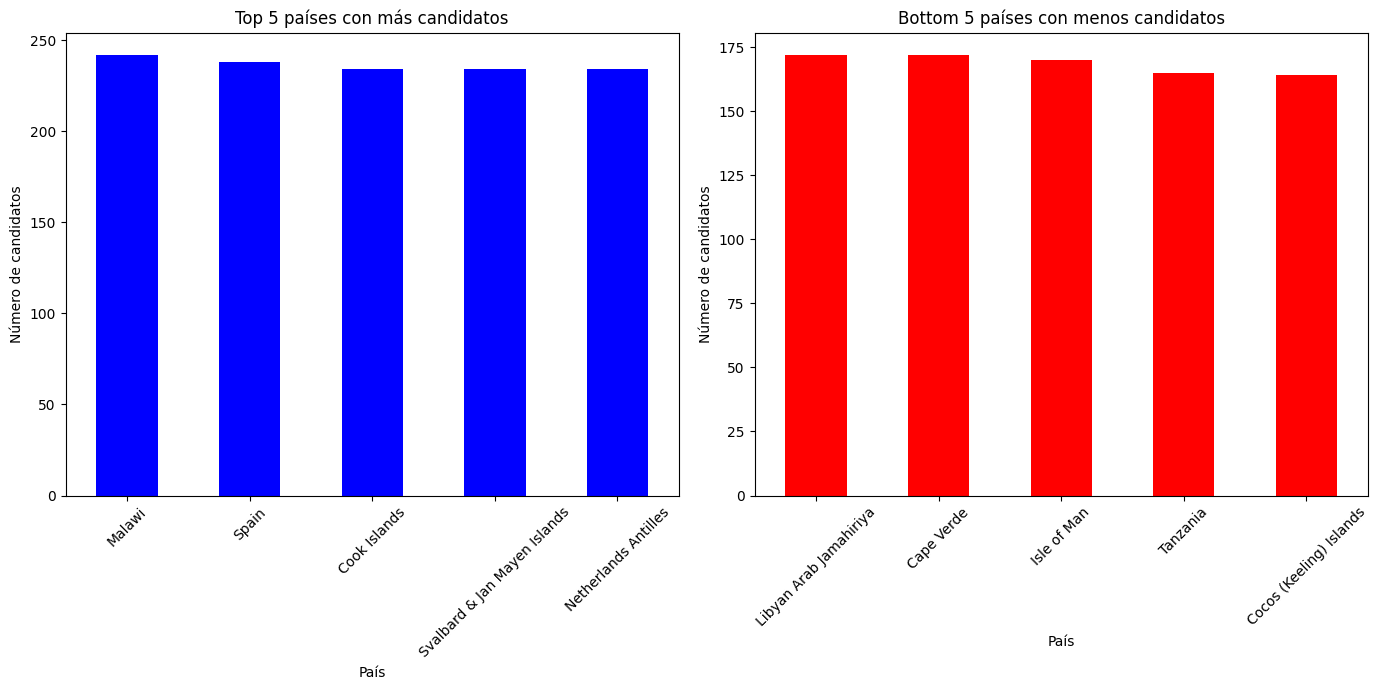

In [13]:
cantidad_paises = candidates['Country'].value_counts()

top_5_paises_mas = cantidad_paises.head(5)

bottom_5_paises_menos = cantidad_paises.tail(5)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
top_5_paises_mas.plot(kind='bar', color='blue')
plt.title('Top 5 países con más candidatos')
plt.xlabel('País')
plt.ylabel('Número de candidatos')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bottom_5_paises_menos.plot(kind='bar', color='red')
plt.title('Bottom 5 países con menos candidatos')
plt.xlabel('País')
plt.ylabel('Número de candidatos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Se puede observar que el pais con mayores candidatos es Malawi con casi 250, mientras que el que menos presenta es el pais de Cocos 

#### Seniority 

Creamos un grafico circular para ver la categoría con mas solicitudes 

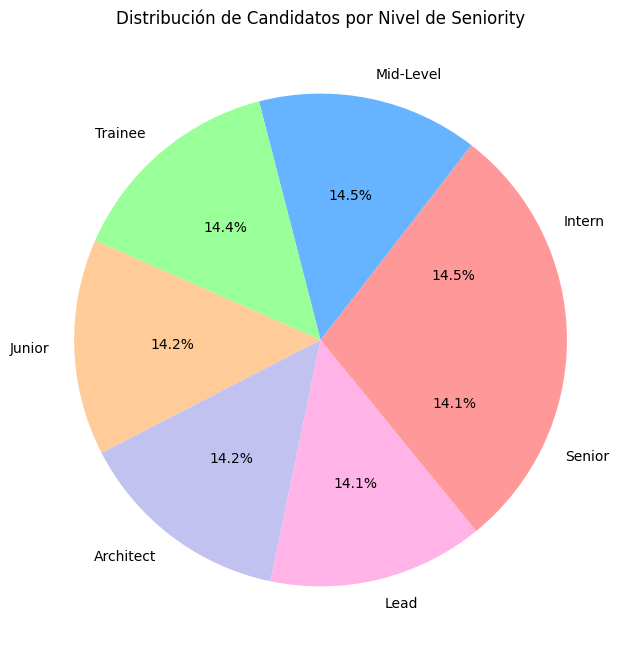

In [14]:
seniority_counts = candidates['Seniority'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

plt.figure(figsize=(8, 8))
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%', colors=colors)

plt.title('Distribución de Candidatos por Nivel de Seniority')

plt.show()

Tenemos que la que mas solicitudes presenta es Mid-Level con un porcentaje de 14.5% una muy pequeña diferencia respecto a las otras 

Creamos un grafico de barras con las categorías que mas veces presentaron un puntaje perfecto en los 2 exámenes 

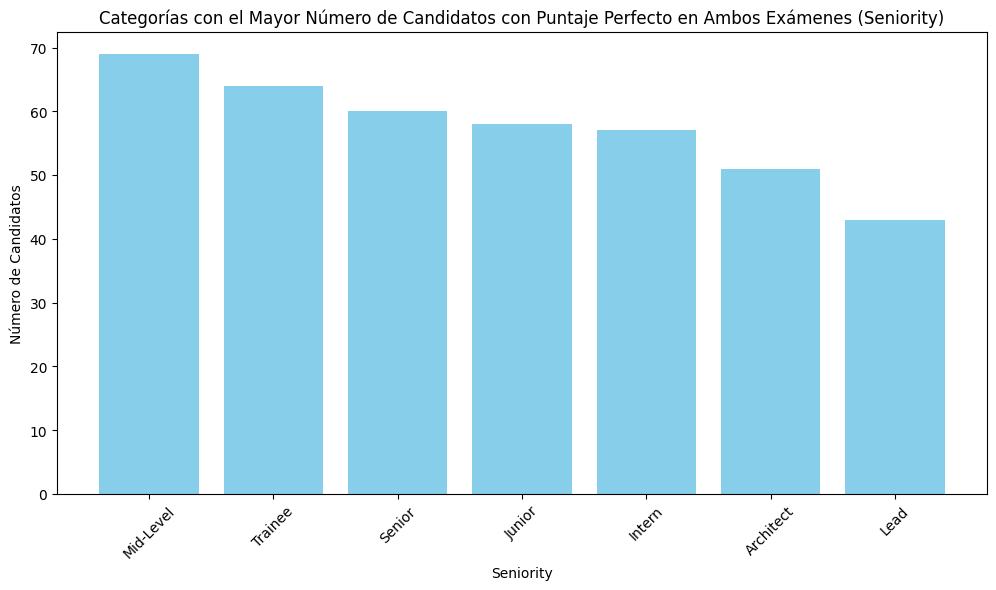

In [15]:
puntaje_maximo = 10
candidatos_puntaje_perfecto = candidates[
    (candidates['CodeChallengeScore'] == puntaje_maximo) & 
    (candidates['TechnicalInterviewScore'] == puntaje_maximo)
]

conteo_seniority = candidatos_puntaje_perfecto['Seniority'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(conteo_seniority.index, conteo_seniority.values, color='skyblue')
plt.xlabel('Seniority')
plt.ylabel('Número de Candidatos')
plt.title('Categorías con el Mayor Número de Candidatos con Puntaje Perfecto en Ambos Exámenes (Seniority)')
plt.xticks(rotation=45)
plt.show()

Tenemos que la categoría que mejor resultados presenta el Mid-Level con una diferencia ligera respecto a las otras

#### Technology

Creamos un grafico de barras de las tecnologias para ver el numero de solicitudes totales por tecnologia 

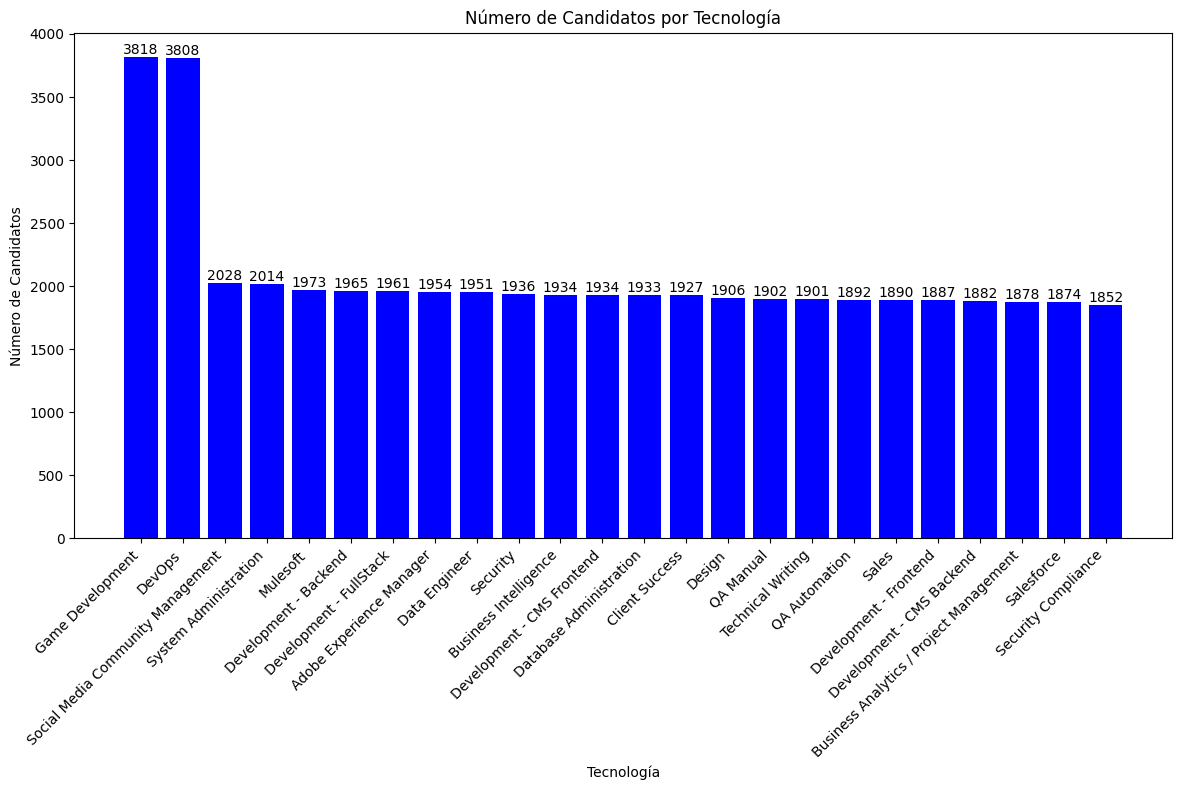

In [16]:
conteo_technology = candidates['Technology'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(conteo_technology.index, conteo_technology, color='blue')

plt.xlabel('Tecnología')
plt.ylabel('Número de Candidatos')
plt.title('Número de Candidatos por Tecnología')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center') 
plt.tight_layout()
plt.show()


Game Development es la que presenta con una diferencia notable mas solicitudes 

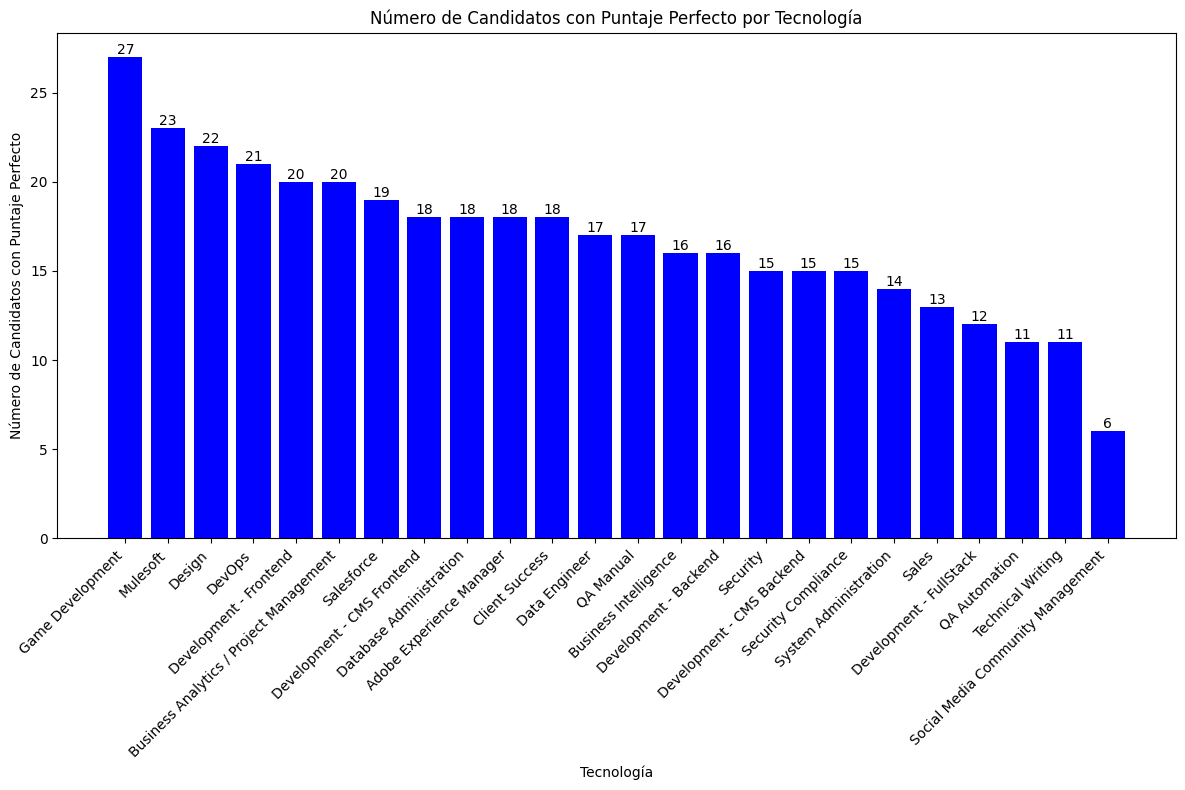

In [17]:
puntaje_maximo = 10
candidatos_puntaje_perfecto = candidates[
    (candidates['CodeChallengeScore'] == puntaje_maximo) & 
    (candidates['TechnicalInterviewScore'] == puntaje_maximo)
]

conteo_perfecto_technology = candidatos_puntaje_perfecto['Technology'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(conteo_perfecto_technology.index, conteo_perfecto_technology, color='blue')

plt.xlabel('Tecnología')
plt.ylabel('Número de Candidatos con Puntaje Perfecto')
plt.title('Número de Candidatos con Puntaje Perfecto por Tecnología')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # va='bottom' para poner el texto justo arriba de la barra
plt.tight_layout()
plt.show()

Game Development es la que presenta una mayor cantidad de puntajes perfectos, pero con una muy pequeña diferencia en comparacion con las otras tecnologias, esto teneindo en cuenta que es la que mas candidatos presenta 

#### YOE

Sacamos el promedio de años de experiencia 

In [20]:
promedio_yoe = candidates['YOE'].mean()
print("El promedio de la columna 'YOE' es: ")
print(promedio_yoe)

El promedio de la columna 'YOE' es: 
15.28698


Tenemos que el promedio de los años de experiencia de los candidatos el cual es 15 años 

C:\Users\camilo\AppData\Local\Temp\ipykernel_13920\4082069293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\camilo\AppData\Local\Temp\ipykernel_13920\4082069293.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


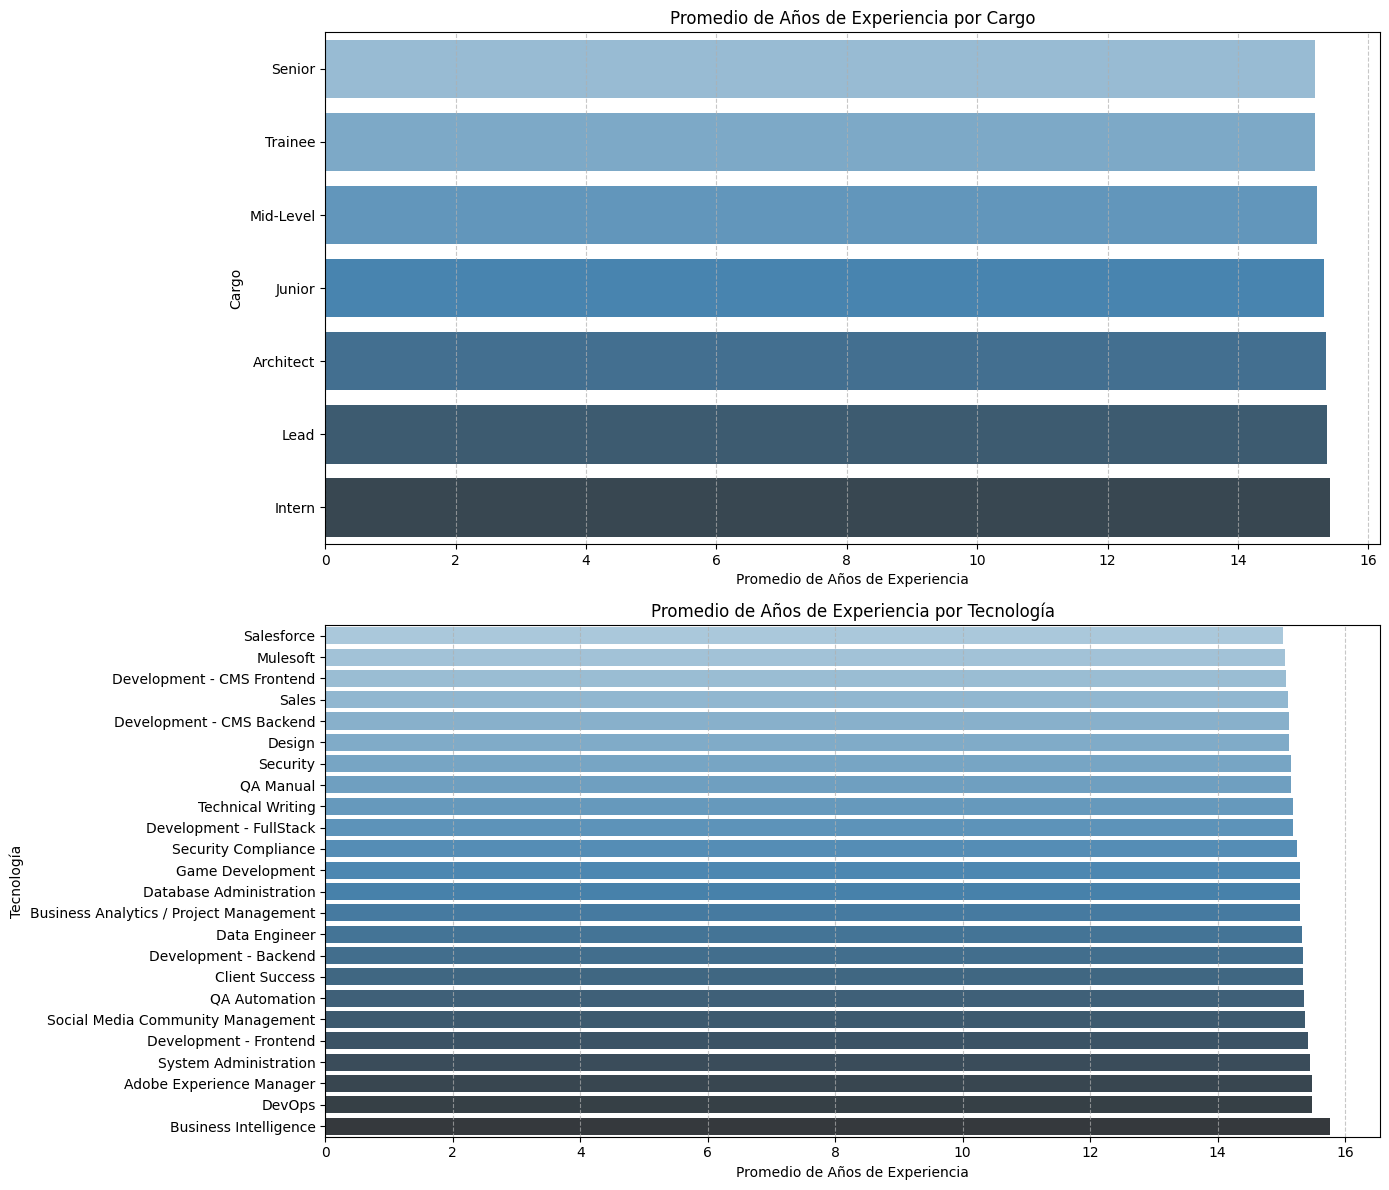

In [21]:
promedio_yoe_seniority = candidates.groupby('Seniority')['YOE'].mean().sort_values()
promedio_yoe_technology = candidates.groupby('Technology')['YOE'].mean().sort_values()

plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
sns.barplot(
    y=promedio_yoe_seniority.index, 
    x=promedio_yoe_seniority.values, 
    palette='Blues_d'
)
plt.title('Promedio de Años de Experiencia por Cargo')
plt.xlabel('Promedio de Años de Experiencia')
plt.ylabel('Cargo')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sns.barplot(
    y=promedio_yoe_technology.index, 
    x=promedio_yoe_technology.values, 
    palette='Blues_d'
)
plt.title('Promedio de Años de Experiencia por Tecnología')
plt.xlabel('Promedio de Años de Experiencia')
plt.ylabel('Tecnología')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Se puede ver que quienes presentan mayores años de experiencia son los que tienen el cargo de intern y en tecnologias es Busines intelligence 

#### Conclusiones 

Se puede concluir que: 

- Este dataset contiene 50.000 filas de Datos y 10 Columnas en las cuales hay información sobre los candidatos a un puesto de trabajo en donde se muestra información relevante como lo es su información personal, Su cargo, su experiencia, sus puntajes en las pruebas entre otras. 

- El dataset esta relativamente limpio pues no se encontró valores nulos, atípicos, o replicados además de que la columna de fecha se encontraba en el formato correcto 

- Entre las columnas se pudo observar que hay candidatos de mas de 244 países, el promedio de años de experiencia es de 15 entre los candidatos. al igual que el cargo Mid-Level y la tecnología Game Development son las mas comunes entre los candidatos, así mismo son las mismas categorías en las cuales se presento una mayor cantidad de Resultados perfectos, sin embargo la tecnología de Business intelligence y el rango Intern son las que presentan un mayor rango de experiencia. 


#### Pasos a seguir 

- Despues de explorar a fondo el dataset se va a crear una nueva columna a la tabla en la Base de Datos llamada ID para una mayor facilidad al identificar los candidatos 

- Se filtrara el dataset para solo dejar los candidatos contratados que se sacaran según el puntaje de las 2 pruebas, esto para facilitar la visualización de datos solicitada 

- Se exportara otro dataset llamado candidates_contratados con estas acciones que almacenaremos en nuestra Base de Datos para la visualización 

- Esto se realiza en el notebook candidates_transformado 